In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import jax
import numpy as np
plt.style.use('science')

In [2]:
import glob
import pandas as pd

path = 'data_completa11'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = [pd.read_csv(file) for file in csv_files]

In [4]:
def pre_process(df):
    feature_keys = ['pm25','pm10','no2','temp','velv','hrel']
    df.columns = df.columns.str.strip()
    df['date_time']=pd.to_datetime(df[['anho', 'mes', 'dia', 'hora']].rename(columns={'anho': 'year', 'mes': 'month', 'dia': 'day', 'hora': 'hour'}))
    df.drop(columns=['anho', 'mes', 'dia','hora'],inplace=True)
    df.drop(columns=['numero_semana', 'numero_dia', 'tipo_dia','estacion_anho'],inplace=True)
    df.set_index('date_time',inplace=True)
    for key in feature_keys:
        if key in df.columns:
            df[key] =df[key].astype(str).str.replace(',', '.').astype(float)
            #df[key].fillna(df[key].mean(), inplace=True)  
    df.resample('1h').sum()      
    return df

In [5]:
df_preprocessed = [pre_process(df) for df in df_list]

In [6]:
df_preprocessed[0].head()

,Estacion,E,N,pm25,pm10,no2,temp,velv,hrel
date_time,,,,,,,,,
2010-01-01 00:00:00,Pudahuel,337311,6298809,10.0,25.0,13.0,16.9250,2.14056,69.0000
2010-01-01 01:00:00,Pudahuel,337311,6298809,12.0,26.0,14.0,16.0750,2.13333,73.1665
2010-01-01 02:00:00,Pudahuel,337311,6298809,12.0,26.0,16.0,15.1833,1.49166,78.1665
2010-01-01 03:00:00,Pudahuel,337311,6298809,10.0,26.0,15.0,14.6833,1.40000,81.6665
2010-01-01 04:00:00,Pudahuel,337311,6298809,10.0,25.0,13.0,14.5000,1.05000,83.5000


In [7]:
df_group=pd.concat(df_preprocessed)

In [9]:
df_group['Estacion'] = df_group['Estacion'].astype('category')    

In [15]:
print("Shape of df_group:", df_group.shape)
print("\nColumns and types:\n", df_group.dtypes)
print("\nMissing values per column:\n", df_group.isnull().sum())
print("\nSummary statistics:\n", df_group.describe(include='all'))

# Distribution of records per station
print("\nRecords per station:\n", df_group['Estacion'].value_counts())


Shape of df_group: (578424, 9)

Columns and types:
 Estacion    category
E              int64
N              int64
pm25         float64
pm10         float64
no2          float64
temp         float64
velv         float64
hrel         float64
dtype: object

Missing values per column:
 Estacion    0
E           0
N           0
pm25        0
pm10        0
no2         0
temp        0
velv        0
hrel        0
dtype: int64

Summary statistics:
          Estacion              E             N           pm25           pm10  \
count      578424  578424.000000  5.784240e+05  578424.000000  578424.000000   
unique         11            NaN           NaN            NaN            NaN   
top     Cerrillos            NaN           NaN            NaN            NaN   
freq        52584            NaN           NaN            NaN            NaN   
mean          NaN  343018.636364  6.293795e+06      26.848572      65.291114   
std           NaN    9988.711938  9.939689e+03      22.781445      51.73879

In [19]:
time_coverage = df_group.groupby('Estacion').apply(lambda x: (x.index.min(), x.index.max()))
print("\nTime coverage per station:\n", time_coverage)



Time coverage per station:
 Estacion
Cerrillos         (2010-01-01 00:00:00, 2015-12-31 23:00:00)
CerroNavia        (2010-01-01 00:00:00, 2015-12-31 23:00:00)
ElBosque          (2010-01-01 00:00:00, 2015-12-31 23:00:00)
Independencia     (2010-01-01 00:00:00, 2015-12-31 23:00:00)
LaFlorida         (2010-01-01 00:00:00, 2015-12-31 23:00:00)
LasCondes         (2010-01-01 00:00:00, 2015-12-31 23:00:00)
ParqueOhiggins    (2010-01-01 00:00:00, 2015-12-31 23:00:00)
Pudahuel          (2010-01-01 00:00:00, 2015-12-31 23:00:00)
PuenteAlto        (2010-01-01 00:00:00, 2015-12-31 23:00:00)
Quilicura         (2010-01-01 00:00:00, 2015-12-31 23:00:00)
Talagante         (2010-01-01 00:00:00, 2015-12-31 23:00:00)
dtype: object


/tmp/ipykernel_107396/1999146662.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_coverage = df_group.groupby('Estacion').apply(lambda x: (x.index.min(), x.index.max()))
/tmp/ipykernel_107396/1999146662.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_coverage = df_group.groupby('Estacion').apply(lambda x: (x.index.min(), x.index.max()))


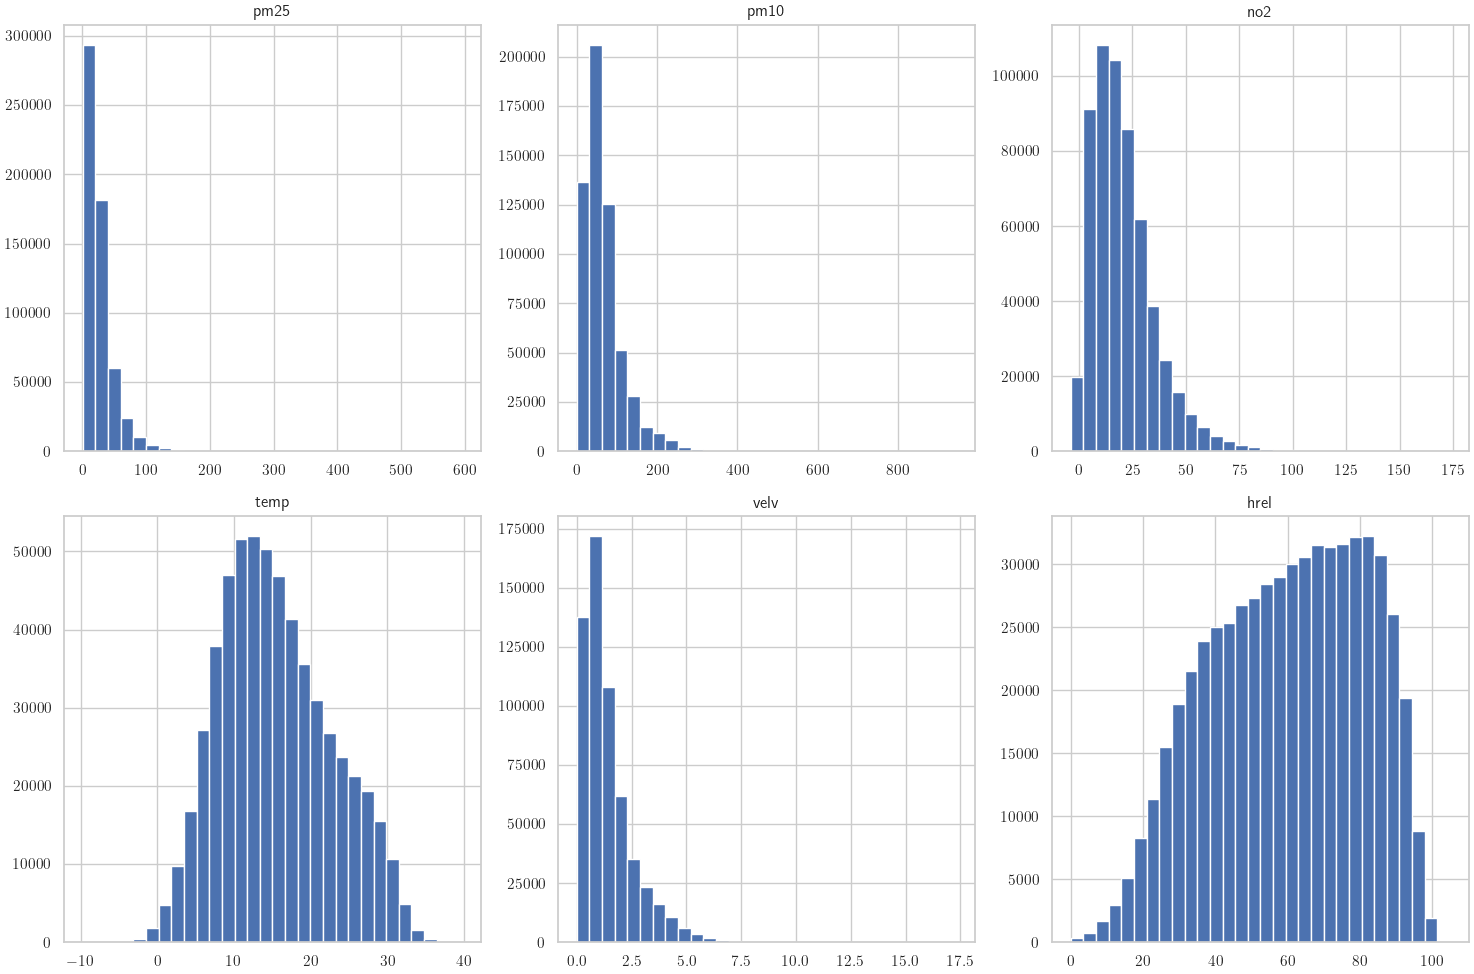

In [30]:
# Plotting distributions for key features
feature_keys = ['pm25', 'pm10', 'no2', 'temp', 'velv', 'hrel']
df_group[feature_keys].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.tight_layout()
plt.savefig('feature_distributions.pdf', bbox_inches='tight',dpi=300)
plt.show()

/tmp/ipykernel_107396/2515253420.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  station_locations = df_group.reset_index().groupby('Estacion').first().reset_index()


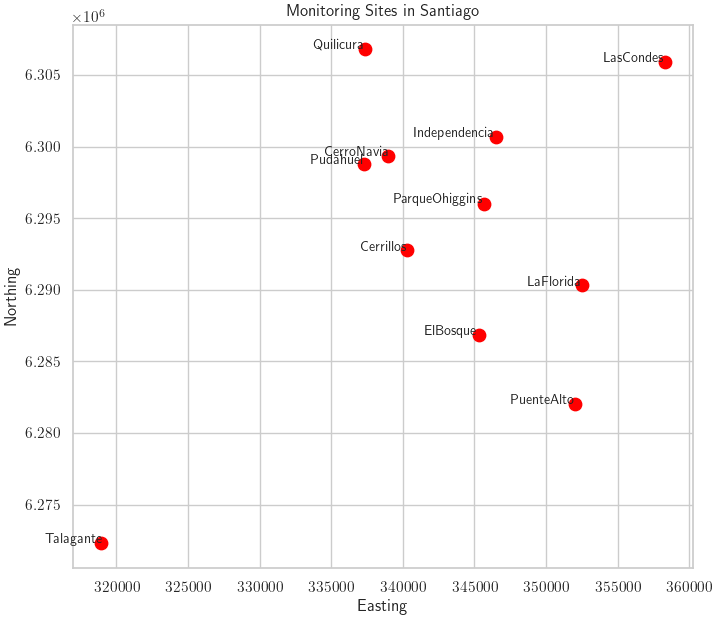

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Extract unique station locations
station_locations = df_group.reset_index().groupby('Estacion').first().reset_index()

# If your columns are named differently, adjust here:
# For example, if they are 'este' and 'norte', rename:
# station_locations = station_locations.rename(columns={'este': 'easting', 'norte': 'northing'})

# Create a GeoDataFrame
gdf_sites = gpd.GeoDataFrame(
    station_locations,
    geometry=gpd.points_from_xy(station_locations['E'], station_locations['N']),
    crs="EPSG:32719"  # Use the correct UTM zone for Santiago, e.g., 32719 for UTM 19S
)

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
gdf_sites.plot(ax=ax, color='red', markersize=80)
for x, y, label in zip(gdf_sites.geometry.x, gdf_sites.geometry.y, gdf_sites['Estacion']):
    ax.text(x, y, label, fontsize=10, ha='right')
ax.set_title('Monitoring Sites in Santiago')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.grid(True)
plt.show()

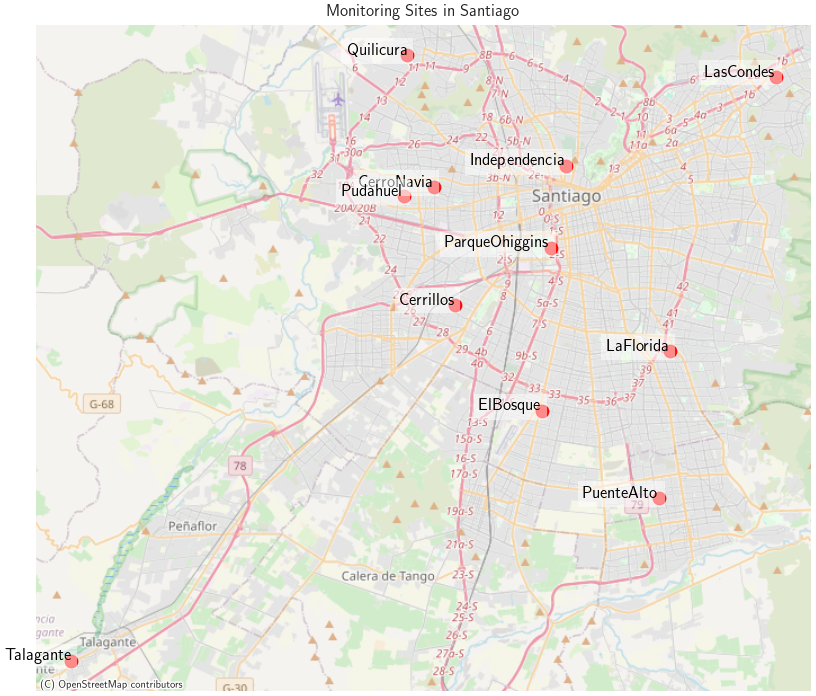

In [29]:
import contextily as ctx

# Plot with OpenStreetMap overlay
fig, ax = plt.subplots(figsize=(10, 10))
gdf_sites = gdf_sites.to_crs(epsg=3857)  # Convert to Web Mercator for contextily

gdf_sites.plot(ax=ax, color='red', markersize=80, alpha=0.9, zorder=2)
for x, y, label in zip(gdf_sites.geometry.x, gdf_sites.geometry.y, gdf_sites['Estacion']):
    ax.text(x, y, label, fontsize=12, ha='right', zorder=3, color='black', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf_sites.crs, alpha=0.7)

ax.set_title('Monitoring Sites in Santiago')
ax.set_axis_off()
plt.savefig('monitoring_stations.pdf', bbox_inches='tight',dpi=300)
plt.show()

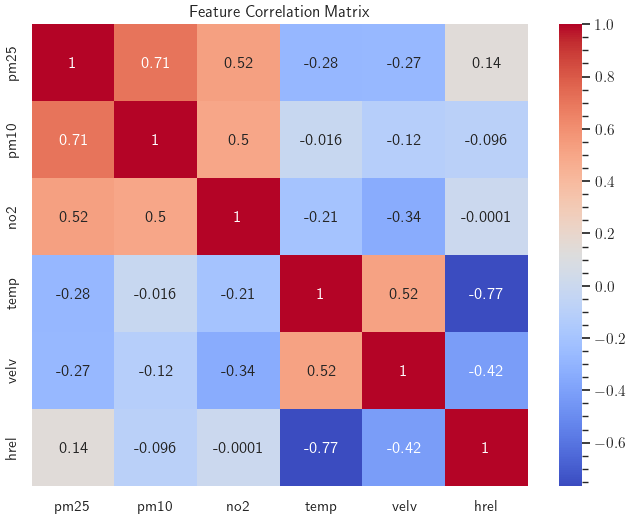

In [32]:
# Correlation matrix
import seaborn as sns
feature_keys = ['pm25', 'pm10', 'no2', 'temp', 'velv', 'hrel']
corr = df_group[feature_keys].corr()
plt.figure(figsize=(8, 6))
plt.title("Feature Correlation Matrix")
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig('feature_correlation.pdf', bbox_inches='tight',dpi=300)
plt.show()

# Model Training

In [34]:
def train_test_split(data,split_fraction,feature_keys):
    data=data[feature_keys]
    train_split = int(split_fraction * int(data.shape[0]))
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    data = (data - data_mean) / data_std
    train_data = data.iloc[0 : train_split - 1]
    val_data = data.iloc[train_split:]
    return train_data,val_data

def create_batch(data,lag,future):
    df_lag=pd.concat([data[:-future].shift(i) for i in range(lag-1,-1,-1)],axis=1).dropna()
    #df_lag.columns=['pm_'+str(i) for i in range(lag,-1,1)]
    X=df_lag.values
    y=data[future+lag-1:].values
    return X,y

def create_batch_multistep(df,lag,future,feature=None):
    if feature is None:
        data=df
    else:
        data=df[feature]
    df_lag=pd.concat([data[:-future].shift(i) for i in range(lag-1,-1,-1)],axis=1).dropna()
    df_future=pd.concat([data[lag-1:].shift(-i) for i in range(1,future+1)],axis=1).dropna()
    #df_lag.columns=['pm_'+str(i) for i in range(lag,-1,1)]
    X=df_lag.values
    y=df_future.values
    return X,y

In [35]:
X_train_datasets=list()
y_train_datasets=list()
X_test_datasets=list()
y_test_datasets=list()
future=1
past=24
dataset_names=list()
for item_id, gdf in df_group.groupby('Estacion'):
    print(f"Processing station: {item_id}")
    gdf = gdf.drop(columns=['Estacion'])
    gdf = gdf.sort_index()
    feature_keys = ['pm25','pm10','no2','temp','velv','hrel']
    # Split data into training and validation sets
    train_data, val_data = train_test_split(gdf, 0.8, feature_keys)
    train_multi_feature=list()
    test_multi_feature=list()
    for feature in feature_keys:
    # Create batches for training and validation
        X_train, y_train = create_batch_multistep(train_data, lag=past, future=future,feature=feature)
        X_val, y_val = create_batch_multistep(val_data, lag=past, future=future,feature=feature)
        train_multi_feature.append(X_train)
        test_multi_feature.append(X_val)
        if feature=='pm25':
            y_train_datasets.append(y_train)
            y_test_datasets.append(y_val)
    X_train_datasets.append(np.stack(train_multi_feature,axis=-1))
    X_test_datasets.append(np.stack(test_multi_feature,axis=-1))
    dataset_names.append(item_id)
    print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")
X_train_datasets=np.stack(X_train_datasets,axis=0)
X_train_datasets=X_train_datasets.swapaxes(-1,-2)
y_train_datasets=np.stack(y_train_datasets,axis=0)
X_test_datasets=np.stack(X_test_datasets,axis=0)
X_test_datasets=X_test_datasets.swapaxes(-1,-2)
y_test_datasets=np.stack(y_test_datasets,axis=0)

/tmp/ipykernel_107396/1005800113.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for item_id, gdf in df_group.groupby('Estacion'):


Processing station: Cerrillos
Train shape: (42042, 24), Validation shape: (10493, 24)
Processing station: CerroNavia
Train shape: (42042, 24), Validation shape: (10493, 24)
Processing station: ElBosque
Train shape: (42042, 24), Validation shape: (10493, 24)
Processing station: Independencia
Train shape: (42042, 24), Validation shape: (10493, 24)
Processing station: LaFlorida
Train shape: (42042, 24), Validation shape: (10493, 24)
Processing station: LasCondes
Train shape: (42042, 24), Validation shape: (10493, 24)
Processing station: ParqueOhiggins
Train shape: (42042, 24), Validation shape: (10493, 24)
Processing station: Pudahuel
Train shape: (42042, 24), Validation shape: (10493, 24)
Processing station: PuenteAlto
Train shape: (42042, 24), Validation shape: (10493, 24)
Processing station: Quilicura
Train shape: (42042, 24), Validation shape: (10493, 24)
Processing station: Talagante
Train shape: (42042, 24), Validation shape: (10493, 24)


In [36]:
X_test_datasets.shape,y_test_datasets.shape

((11, 10493, 6, 24), (11, 10493, 1))

In [37]:
import jax
import jax.numpy as jnp

def get_dataloader(X,y,batch_size,key,axis=0):
    num_train=X.shape[axis]
    indices = jnp.array(list(range(0,num_train)))
    indices=jax.random.permutation(key,indices)
    for i in range(0, len(indices),batch_size):
        batch_indices = jnp.array(indices[i: i+batch_size])
        yield X[:,batch_indices,:,:], y[:,batch_indices]

In [38]:
import optax
from flax import linen as nn
from functools import partial
import distrax

class LSTM(nn.Module):

    @nn.remat
    @nn.compact
    def __call__(self, X_batch):
        carry,x=nn.RNN(nn.LSTMCell(32),return_carry=True)(X_batch)
        #carry,x=nn.RNN(nn.LSTMCell(32),return_carry=True)(x)
        x=nn.Dense(future)(x)
        return x[:,-1,:]

def site_log_likelihood(params, x, y):
    preds = jax.vmap(model.apply, (0, 0))(params, jnp.array(x,dtype=jnp.float32))
    return -1.0*jnp.mean(distrax.Normal(preds,1.0).log_prob(jnp.array(y,dtype=jnp.float32)),axis=1)

def log_likelihood(params, X, y_data):
    log_likelihoods = site_log_likelihood(params, X, y_data)
    return jnp.mean(log_likelihoods)


grad_log_post=jax.jit(jax.grad(log_likelihood))

@partial(jax.jit, static_argnums=(3,4))
def sgld_kernel_momemtum(key, params, momemtum,grad_log_post, dt, X, y_data):
    gamma,eps=0.9,1e-6
    key, subkey = jax.random.split(key, 2)
    grads = grad_log_post(params, X, y_data)
    squared_grads=jax.tree.map(lambda g: jnp.square(g),grads)
    momemtum=jax.tree.map(lambda m,s : gamma*m+(1-gamma)*s,momemtum,squared_grads)
    noise=jax.tree.map(lambda p: jax.random.normal(key=subkey,shape=p.shape), params)
    params=jax.tree.map(lambda p, g,m,n: p-0.5*dt*g/(m+eps)+jnp.sqrt(dt)*n, params, grads,momemtum,noise)
    return key, params,momemtum

def sgld(key,log_post, grad_log_post, num_samples,
                             dt, x_0,X_train_datasets,y_train_datasets,batch_size,
                             test_data=None):
    samples = list()
    loss=list()
    param = x_0
    key_data, key_model = jax.random.split(key, 2)
    momemtum=jax.tree.map(lambda p:jnp.zeros_like(p),param)
    key_data_batch=jax.random.split(key_data, num_samples)
    for i in range(num_samples):
        train_data=get_dataloader(X_train_datasets,y_train_datasets,batch_size,key_data_batch[i],axis=1)
        for _,(X_batch, y_batch) in enumerate(train_data):
            key_model,param,momemtum = sgld_kernel_momemtum(key_model, param,momemtum, grad_log_post, dt, X_batch, y_batch)
        loss.append(site_log_likelihood(param,X_batch,y_batch))
        samples.append(param)
        if (i%(num_samples//10)==0):
            print('iteration {0}, loss {1:.2f}'.format(i,loss[-1].mean()))
    loss=np.stack(loss,axis=1)
    return samples,loss


2025-06-12 16:24:58.330283: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-12 16:24:58.465427: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-12 16:24:58.503457: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-12 16:25:00.325867: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [39]:
key=jax.random.PRNGKey(0)
key_model,key_data=jax.random.split(key,2)
batch_size=256

In [40]:
model=LSTM()
n_groups=X_train_datasets.shape[0]
n_features=len(feature_keys)
inputs = jax.random.randint(key,(batch_size,n_features,past),0, 10,).astype(jnp.float32)
key_tasks=jax.random.split(key_model,n_groups)
params_tasks = jax.vmap(model.init, (0, None))(key_tasks, inputs)

In [42]:
dt=1e-5
samples,loss=sgld(key_data,log_likelihood, grad_log_post, 500,
                             dt, params_tasks,X_train_datasets,y_train_datasets,
                             batch_size,test_data=None)

iteration 0, loss 1.05
iteration 50, loss 1.00
iteration 100, loss 0.98
iteration 150, loss 0.97
iteration 200, loss 1.00
iteration 250, loss 1.00
iteration 300, loss 0.98
iteration 350, loss 0.99
iteration 400, loss 1.00
iteration 450, loss 0.98


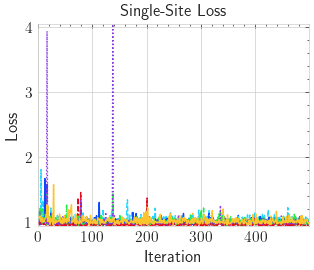

In [46]:
pparam = dict(xlabel="Iteration", ylabel=r"Loss")
with plt.style.context(["science","high-vis"]):
    #plt.Figure(figsize=(10, 16))
    n_groups = loss.shape[0]
    dataset_names = dataset_names[:n_groups]  # Ensure we only use names for the groups we have data for
    fig, ax = plt.subplots()
    for i in range(n_groups):
        ax.plot(loss[i,:,0], label=f'Station {dataset_names[i]}')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    #plt.legend()
    #ax.xlabel('Iteration')
    #ax.ylabel('Loss')
    plt.title('Single-Site Loss')
    ax.grid()
plt.grid(True)
plt.savefig('single_site_loss.pdf', bbox_inches='tight',dpi=300)
plt.show()

In [47]:
preds = jax.vmap(model.apply, (0, 0))(params_tasks, jnp.array(X_test_datasets[:,0:256,:,:]))

In [48]:
import pickle

with open('sgld.samples', 'wb') as samples_file:
    pickle.dump(samples, samples_file)

# MCMC Model Diagnostics



In [49]:
with open('sgld.samples', 'rb') as samples_file:
    samples = pickle.load(samples_file)

In [50]:
reshaper = lambda s : jax.tree.map(lambda p : p.reshape((n_groups,-1)),s)

flat_params=list()
for s in samples:
    flat_sample=reshaper(s)['params']
    flat_sample=(jax.tree_util.tree_flatten(flat_sample)[0])
    flat_sample=jnp.concatenate(flat_sample,axis=-1)
    flat_params.append(flat_sample)
flat_params=jnp.stack(flat_params,axis=1)

In [51]:
import tensorflow_probability as tfp


In [52]:
import tensorflow_probability as tfp

ess_list=list()

for g in flat_params:
    ess = tfp.mcmc.effective_sample_size(g, filter_beyond_positive_pairs=True)
    ess_list.append(ess.numpy())
ess_list=jnp.stack(ess_list)

/home/sergio/virtualenvs/jax/lib/python3.12/site-packages/tensorflow_probability/python/__init__.py:70: UserWarning: TensorFloat-32 matmul/conv are enabled for NVIDIA Ampere+ GPUs. The resulting loss of precision may hinder MCMC convergence. To turn off, run `tf.config.experimental.enable_tensor_float_32_execution(False)`. For more detail, see https://github.com/tensorflow/community/pull/287.
  warnings.warn(


2025-06-12 16:55:51.926743: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


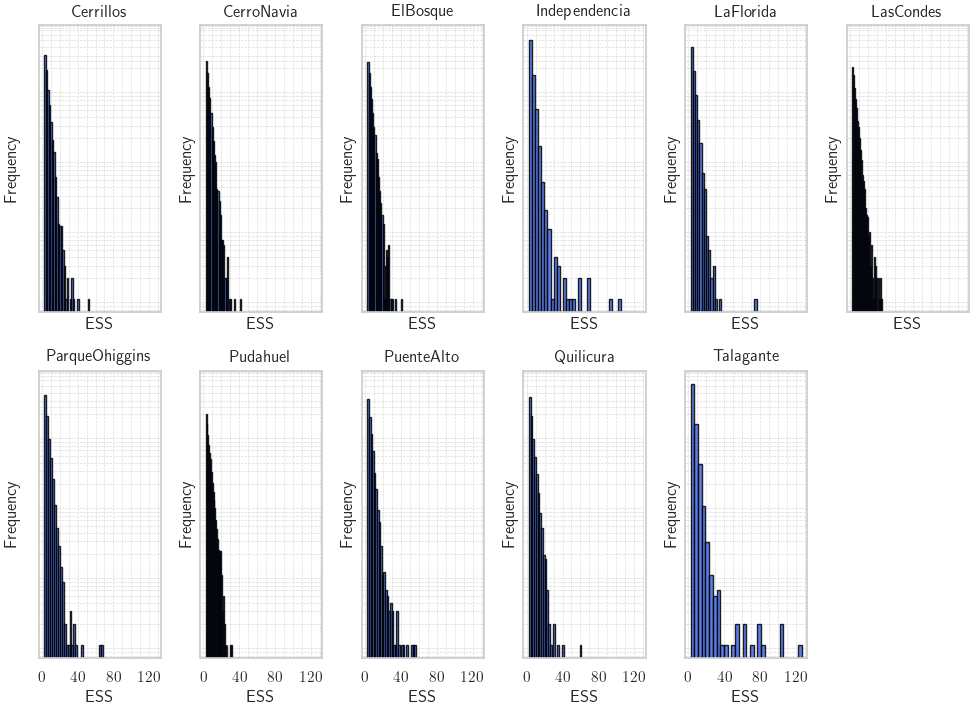

In [ ]:
import matplotlib.ticker as mticker

fig, axes = plt.subplots(2, 6, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i, ess in enumerate(ess_list):
    axes[i].hist(ess, bins=30, color='royalblue', alpha=0.85, edgecolor='black')
    axes[i].set_title(dataset_names[i], fontsize=12)
    axes[i].set_yscale('log')
    axes[i].set_xscale('log')
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    axes[i].set_xlabel("ESS", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].xaxis.set_major_locator(mticker.MaxNLocator(4))
    axes[i].yaxis.set_major_locator(mticker.MaxNLocator(4))

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

#fig.suptitle("Effective Sample Size (ESS) per Station", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('single_site_ess.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Posterior Predictive

In [45]:
X_test=X_test_datasets
params=samples[-1]
preds=jax.vmap(model.apply, (0, 0))(params, X_test)

In [46]:
from sklearn import metrics
r_metric=list()
rmse_metric=list()
mae_metric=list()
for i in range(n_groups):
    r_squared=metrics.r2_score(preds[i,:,:],y_test_datasets[i,:,:])
    rmse=metrics.mean_squared_error(preds[i,:,:],y_test_datasets[i,:,:])
    mae=metrics.mean_absolute_error(preds[i,:,:],y_test_datasets[i,:,:])
    r_metric.append(r_squared)
    rmse_metric.append(rmse)
    mae_metric.append(mae)
    print('task : {0}, RMSE : {1:1.2f}, MAE :{2:1.2f}, R2 :{3:1.2f}'.format(dataset_names[i],rmse,mae,r_squared))
print('-------------------------------------------------------')
print('RMSE : {0:1.2f}, MAE :{1:1.2f}, R2 :{2:1.2f}'.format(np.mean(rmse_metric),np.mean(mae_metric),np.mean(r_metric)))

task : Cerrillos, RMSE : 0.22, MAE :0.30, R2 :0.78
task : CerroNavia, RMSE : 0.09, MAE :0.18, R2 :0.88
task : ElBosque, RMSE : 0.17, MAE :0.26, R2 :0.80
task : Independencia, RMSE : 0.23, MAE :0.32, R2 :0.80
task : LaFlorida, RMSE : 0.19, MAE :0.28, R2 :0.82
task : LasCondes, RMSE : 0.28, MAE :0.34, R2 :0.73
task : ParqueOhiggins, RMSE : 0.27, MAE :0.32, R2 :0.69
task : Pudahuel, RMSE : 0.14, MAE :0.21, R2 :0.85
task : PuenteAlto, RMSE : 0.22, MAE :0.30, R2 :0.72
task : Quilicura, RMSE : 0.22, MAE :0.29, R2 :0.79
task : Talagante, RMSE : 0.36, MAE :0.35, R2 :0.59
-------------------------------------------------------
RMSE : 0.22, MAE :0.29, R2 :0.77


In [47]:
ensemble_pred=list()
X_test=X_test_datasets
for i in range(len(samples)):
    preds=jax.vmap(model.apply, (0, 0))(samples[i], X_test)
    ensemble_pred.append(preds)

In [48]:
ensemble_pred=np.stack(ensemble_pred,axis=-1)

In [49]:
mean_pred=np.mean(ensemble_pred,axis=-1)
std_pred=np.std(ensemble_pred,axis=-1)

In [50]:
r_metric=list()
rmse_metric=list()
mae_metric=list()
for i in range(n_groups):
    r_squared=metrics.r2_score(mean_pred[i,:,:],y_test_datasets[i,:,:])
    rmse=metrics.mean_squared_error(mean_pred[i,:,:],y_test_datasets[i,:,:])
    mae=metrics.mean_absolute_error(mean_pred[i,:,:],y_test_datasets[i,:,:])
    r_metric.append(r_squared)
    rmse_metric.append(rmse)
    mae_metric.append(mae)
    print('task : {0}, RMSE : {1:1.2f}, MAE :{2:1.2f}, R2 :{3:1.2f}'.format(dataset_names[i],rmse,mae,r_squared))
print('-------------------------------------------------------')
print('RMSE : {0:1.2f}, MAE :{1:1.2f}, R2 :{2:1.2f}'.format(np.mean(rmse_metric),np.mean(mae_metric),np.mean(r_metric)))

task : Cerrillos, RMSE : 0.18, MAE :0.28, R2 :0.82
task : CerroNavia, RMSE : 0.08, MAE :0.16, R2 :0.90
task : ElBosque, RMSE : 0.15, MAE :0.24, R2 :0.83
task : Independencia, RMSE : 0.19, MAE :0.30, R2 :0.83
task : LaFlorida, RMSE : 0.17, MAE :0.26, R2 :0.84
task : LasCondes, RMSE : 0.23, MAE :0.32, R2 :0.75
task : ParqueOhiggins, RMSE : 0.23, MAE :0.30, R2 :0.74
task : Pudahuel, RMSE : 0.11, MAE :0.20, R2 :0.88
task : PuenteAlto, RMSE : 0.19, MAE :0.28, R2 :0.74
task : Quilicura, RMSE : 0.18, MAE :0.26, R2 :0.82
task : Talagante, RMSE : 0.28, MAE :0.32, R2 :0.69
-------------------------------------------------------
RMSE : 0.18, MAE :0.27, R2 :0.80


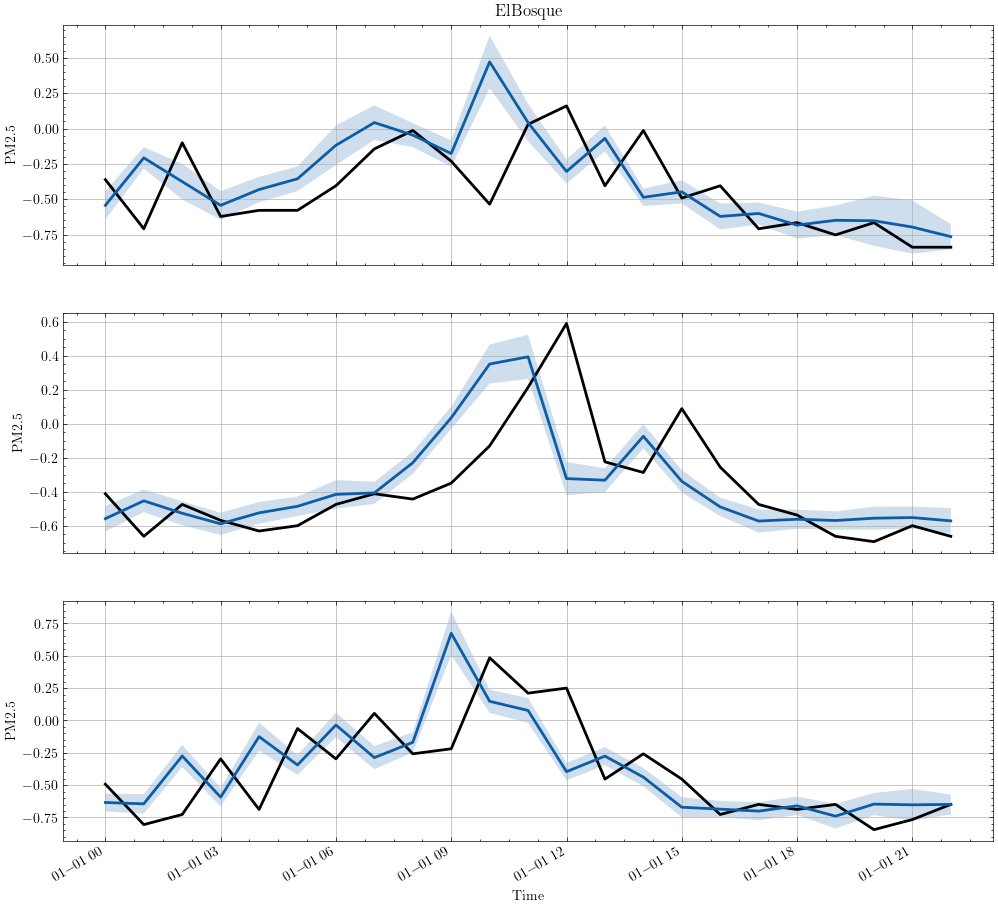

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(12, 12))

future_pred=0
names=np.ravel(gdf.index[0:23].to_frame().values)
ax1.plot(names,y_test_datasets[0,:23,future_pred], linewidth=2,color="black")
ax1.plot(names,mean_pred[0,2:25,future_pred], linewidth=2)
ax1.fill_between(names,np.ravel(mean_pred[0,2:25,future_pred]-std_pred[0,2:25,future_pred]),np.ravel(mean_pred[0,2:25,future_pred]+std_pred[0,2:25,future_pred]),alpha=0.2)
ax1.set_xlabel('Time')
ax1.set_ylabel('PM2.5')
#ax1.legend(dataset_names[0], loc="upper left", fontsize="xx-large")
ax1.grid(True)

ax2.plot(names,y_test_datasets[1,:23,future_pred], linewidth=2,color="black")
ax2.plot(names,mean_pred[1,2:25,future_pred], linewidth=2)
ax2.fill_between(names,np.ravel(mean_pred[1,2:25,future_pred]-std_pred[1,2:25,future_pred]),np.ravel(mean_pred[1,2:25,future_pred]+std_pred[1,2:25,future_pred]),alpha=0.2)
ax2.set_xlabel('Time')
ax2.set_ylabel('PM2.5')
ax1.set_title(dataset_names[1])
ax2.grid(True)

ax3.plot(names,y_test_datasets[2,:23,future_pred], linewidth=2,color="black")
ax3.plot(names,mean_pred[2,2:25,future_pred], linewidth=2)
ax3.fill_between(names,np.ravel(mean_pred[2,2:25,future_pred]-std_pred[2,2:25,future_pred]),np.ravel(mean_pred[2,2:25,future_pred]+std_pred[2,2:25,future_pred]),alpha=0.2)
ax3.set_xlabel('Time')
ax3.set_ylabel('PM2.5')
ax1.set_title(dataset_names[2])
ax3.grid(True)

fig.autofmt_xdate()

In [174]:
import jaxlib 

jaxlib.__version__

'0.4.30'

In [175]:
import flax 

flax.__version__

'0.8.5'